<a href="https://colab.research.google.com/github/Uzmamushtaque/Projects-in-Machine-Learning-and-AI/blob/main/CreditCardFraudKaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,47628.000000,47628.000000,47628.000000,47628.000000,47628.000000,47628.000000,47628.000000,47628.000000,47628.000000,47628.000000,...,47627.000000,47627.000000,47627.000000,47627.000000,47627.000000,47627.000000,47627.000000,47627.000000,47627.000000,47627.000000
mean,28183.123562,-0.240703,0.021469,0.694689,0.191074,-0.249837,0.102310,-0.119867,0.053450,0.141204,...,-0.027059,-0.107091,-0.039399,0.007890,0.136314,0.022561,0.004907,0.004021,91.777163,0.003065
std,13001.722320,1.884794,1.626518,1.519894,1.402196,1.412854,1.309931,1.282101,1.216930,1.214104,...,0.737251,0.637200,0.579666,0.594175,0.438367,0.502411,0.388191,0.335275,249.818013,0.055283
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-9.283925,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.577118,-8.567638,-9.617915,0.000000,0.000000
25%,20517.000000,-0.990001,-0.548684,0.220594,-0.714455,-0.857297,-0.636473,-0.602224,-0.146950,-0.597975,...,-0.231991,-0.528167,-0.179247,-0.322459,-0.128057,-0.329467,-0.063838,-0.006862,7.590000,0.000000
50%,32930.500000,-0.248789,0.085468,0.800243,0.195142,-0.282244,-0.152017,-0.074952,0.057092,0.026153,...,-0.069134,-0.081945,-0.051439,0.061661,0.175871,-0.068195,0.008665,0.021873,24.990000,0.000000
75%,38236.000000,1.156434,0.736933,1.432158,1.070576,0.286638,0.492728,0.425886,0.329612,0.837269,...,0.107256,0.306116,0.078475,0.401231,0.421741,0.302743,0.083933,0.076168,83.110000,0.000000
max,43282.000000,1.960497,18.183626,4.101716,16.491217,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,12910.930000,1.000000


In [5]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
47623,43281,-0.696585,1.108944,1.413769,-0.127104,0.018555,-0.455078,0.587554,0.113729,-0.121544,...,-0.239606,-0.547457,0.045935,0.029361,-0.228841,0.108686,0.388269,0.173609,5.49,0.0
47624,43282,-0.282262,-1.212401,2.174897,-0.181501,-1.604027,-0.332694,-1.154018,0.223029,0.605392,...,-0.444623,-0.224011,0.728520,0.958983,-0.712869,0.908167,-0.054453,-0.107284,10.00,0.0
47625,43282,-1.513495,-0.206282,-0.702405,1.056423,1.058711,-0.708973,0.611571,0.249949,-0.844057,...,0.089904,0.723147,1.244035,-0.526450,-0.267320,-0.336504,0.398350,-0.017047,89.99,0.0
47626,43282,-0.659193,1.270953,0.946464,-0.370180,1.619207,-0.288297,1.588317,-0.492843,-0.829508,...,-0.060858,-0.028588,-0.704004,-0.971430,1.036058,-0.329102,-0.276970,-0.183521,0.99,0.0
47627,43282,1.121749,-0.208202,0.660816,0.857988,-0.823614,-0.422509,-0.286708,0.098616,0.541126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df['Class'].value_counts()

0.0    47481
1.0      146
Name: Class, dtype: int64

In [9]:
df.dtypes

Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object

# EDA

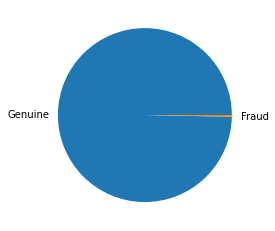

In [11]:

data=df.copy()
data[" "]=np.where(data['Class']==1,'Fraud','Genuine')


data[" "].value_counts().plot(kind='pie')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


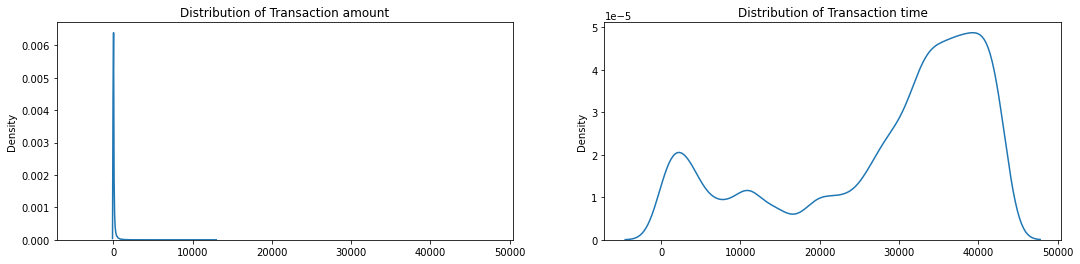

In [18]:
f, axes= plt.subplots(1,2,figsize=(18,4), sharex=True)

amount=df['Amount'].values
time=df['Time'].values
sns.distplot(amount, hist = False, ax=axes[0]).set_title('Distribution of Transaction amount')
sns.distplot(time, hist = False,ax=axes[1]).set_title('Distribution of Transaction time')
plt.show()

In [20]:
#Average in a Fraudulent Transaction
df[df['Class']==1]['Amount'].mean()

100.7695890410959

In [21]:
#Average in a Normal Transaction
df[df['Class']==0]['Amount'].mean()

91.74951159411134